In [272]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('ML_Data/DJI_vader.csv')
df.head()


,Unnamed: 0,date,negatives,positives,ratio,negatives (t-1),positives (t-1),ratio (t-1),negatives (t-2),positives (t-2),ratio (t-2),label
0,0,2019-05-03,7,8,0.533333,0.0,0.0,0.000000,0.0,0.0,0.000000,0
1,1,2019-05-02,15,8,0.347826,7.0,8.0,0.533333,0.0,0.0,0.000000,1
2,2,2019-05-01,9,14,0.608696,15.0,8.0,0.347826,7.0,8.0,0.533333,0
3,3,2019-04-30,3,5,0.625000,9.0,14.0,0.608696,15.0,8.0,0.347826,0
4,4,2019-04-29,5,2,0.285714,3.0,5.0,0.625000,9.0,14.0,0.608696,1


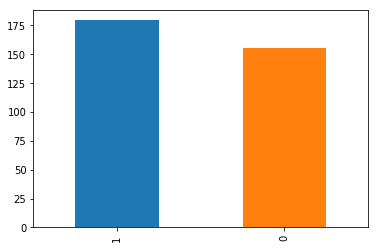

In [273]:
df['label'].value_counts().plot(kind='bar')

In [264]:
# get test data for Aske
#test_df = df.head(10)
#df = df.tail(-10)
# end getting test data

In [265]:

y = df['label']
X = df.drop(['label','date'], axis=1)
X = X.values

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Split data

In [266]:

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression

In [267]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train, y_train)
lr.predict(X_test)

score = lr.score(X_test, y_test)
print(score)

0.5373134328358209


# Support Vector Machine

In [268]:
from sklearn import svm

svm = svm.SVC(gamma = 8, C = 2)
svm.fit(X_train, y_train)
svm.predict(X_test)

score = svm.score(X_test, y_test)
print(score)

0.6119402985074627


# Naive bayes

In [269]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.predict(X_test)

score = nb.score(X_test, y_test)
print(score)

0.6417910447761194


# Random forrest

In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier(max_depth = 5, n_estimators = 11, random_state = 1)
rf.fit(X_train, y_train)
yPredRf = rf.predict(X_test)

score = f1_score(yPredRf, y_test)
print(score)

0.6419753086419754


# Output

In [25]:
new_test_df = pd.DataFrame({'date':test_df['date'].values, 'label':pred})

In [15]:
new_test_df.to_csv('ML_Data/new_test_df.csv')